# 1) Data Engineering



In [1]:
# importing required libraries for dashboarding and data processing
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output, State
import plotly.express as px
import pandas as pd
import numpy as np

# forecasting libraries
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
#import tensorflow as tf


## Description of US Dataset for CPI

The extracted dataset represents Consumer Price Index data for All Urban Consumers: All Items in U.S. City Average.
Data values have been indexed to 2015, and data has been seasonally adjusted.
 
**Dataset ID**: CPIAUCSL

**Dataset Link**: https://fred.stlouisfed.org/series/CPIAUCSL#0



In [3]:
# EXTRACTING + PREPROCESSING US DATA FOR CPI

us_index_cpi = pd.read_excel("US_INDEX_CPI.xls", header=0, skiprows=10)    # extract data from excel

us_index_cpi.columns = ["Month", "Change"]    # change column names

us_index_cpi['Month'] = pd.to_datetime(us_index_cpi.Month)    # convert date values to datetime 

us_index_cpi['MoM'] = us_index_cpi['Change'].pct_change() * 100 #find MoM values

us_index_cpi['YoY'] = us_index_cpi['Change'].pct_change(periods=12) * 100   #find YoY values

us_index_cpi['3Mo3M'] = us_index_cpi['Change'].pct_change(periods=3) * 100   #find 3Mo3M values

# Reformatting dataframe to transform into heatmap

us_index_cpi = us_index_cpi.transpose()    # transform df from long to wide format

us_index_cpi.columns = us_index_cpi.iloc[0]    # change headers of each column to the first row of df

us_index_cpi = us_index_cpi.drop(us_index_cpi.index[0])    # remove first row of df

us_index_cpi.head()

Month,1947-01-01,1947-02-01,1947-03-01,1947-04-01,1947-05-01,1947-06-01,1947-07-01,1947-08-01,1947-09-01,1947-10-01,...,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01
Change,9.15028,9.20992,9.37179,9.37179,9.35049,9.40587,9.46977,9.54219,9.72962,9.75944,...,122.94555,124.07741,125.55134,125.50874,125.80352,126.32281,126.93964,127.19992,127.36691,128.02549
MoM,NaN,0.651783,1.757561,0.0,-0.227278,0.592268,0.679363,0.764749,1.964224,0.306487,...,0.39621,0.920619,1.187912,-0.03393,0.234868,0.412779,0.488297,0.205042,0.131282,0.517073
YoY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.227765,8.502334,8.932991,8.413184,8.227354,8.21486,7.762496,7.135345,6.444943,6.347154
3Mo3M,NaN,NaN,NaN,2.4208,1.526289,0.363645,1.045478,2.05016,3.442,3.058892,...,2.127392,2.339337,2.524074,2.084817,1.391156,0.614466,1.14008,1.109985,0.826533,0.855407


## Description of UK Dataset for CPI

The extracted dataset represents Consumer Price Index data for all items in the UK. 
Data values have been indexed to 2015, and data has been seasonally adjusted.

**Dataset ID**: D7BT

**Dataset Link**: https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/d7bt/mm23

In [4]:
# EXTRACTING + PREPROCESSING UK DATA FOR CPI

uk_index_cpi = pd.read_excel("UK_INDEX_CPI.xls", header=0, skiprows=182)    # extract data from excel

uk_index_cpi.columns = ["Month", "Change"]    # change column names

uk_index_cpi['Month'] = pd.to_datetime(uk_index_cpi.Month)    # convert date values to datetime 

# Since CPI has been indexed, it is sufficient to subtract the values to get the % change of that period

uk_index_cpi['MoM'] = uk_index_cpi['Change'].pct_change() * 100  #find MoM values

uk_index_cpi['YoY'] = uk_index_cpi['Change'].pct_change(periods=12) * 100   #find YoY values

uk_index_cpi['3Mo3M'] = uk_index_cpi['Change'].pct_change(periods=3) * 100  #find 3Mo3M values

# Reformatting dataframe to transform into heatmap

uk_index_cpi = uk_index_cpi.transpose()    # transform df from long to wide format

uk_index_cpi.columns = uk_index_cpi.iloc[0]    # change headers of each column to the first row of df

uk_index_cpi = uk_index_cpi.drop(uk_index_cpi.index[0])    # remove first row of df

uk_index_cpi.head()

Month,1988-01-01,1988-02-01,1988-03-01,1988-04-01,1988-05-01,1988-06-01,1988-07-01,1988-08-01,1988-09-01,1988-10-01,...,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01
Change,48.4,48.6,48.7,49.3,49.5,49.7,49.7,49.9,50.1,50.3,...,120.0,120.8,121.8,122.5,123.1,123.8,126.2,126.7,127.2,126.4
MoM,NaN,0.413223,0.205761,1.232033,0.40568,0.40404,0.0,0.402414,0.400802,0.399202,...,2.476516,0.666667,0.827815,0.574713,0.489796,0.568643,1.938611,0.396197,0.394633,-0.628931
YoY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.991826,9.025271,9.433962,10.062893,9.812667,10.142349,11.091549,10.655022,10.512598,10.008703
3Mo3M,NaN,NaN,NaN,1.859504,1.851852,2.053388,0.811359,0.808081,0.804829,1.207243,...,4.438642,4.317789,4.013664,2.083333,1.903974,1.642036,3.020408,2.924452,2.746365,0.158479


## Description of Germany Dataset for CPI

The extracted dataset is a subset of the G20 CPI aggregate dataset containing national CPIs for all G20 countries.
Data values have been indexed to 2015. 

**Dataset ID**: PRC_IPC_G20

**Dataset Link**: https://ec.europa.eu/eurostat/databrowser/view/PRC_IPC_G20__custom_5075295/default/table?lang=en

In [5]:
# EXTRACTING + PREPROCESSING OF GERMANY DATA FOR CPI
# ignore UserWarning: Workbook contains no default style, apply openpyxl's default

ger_index_cpi = pd.read_excel(
    "GERMANY_INDEX_CPI.xlsx", sheet_name="Sheet 1", skiprows=7)    # extract data from excel

ger_index_cpi = ger_index_cpi.dropna()    # drop rows with na

ger_index_cpi = ger_index_cpi.melt()    # transform df from wide to long format first

ger_index_cpi.columns = ["Month", "Change"]    # change column names

ger_index_cpi = ger_index_cpi.iloc[1:, :]    # drop first row


ger_index_cpi['Month'] = pd.to_datetime(ger_index_cpi.Month)    # convert date values to datetime 

# Since CPI has been indexed, it is sufficient to subtract the values to get the % change of that period

ger_index_cpi['MoM'] = ger_index_cpi['Change'].pct_change() * 100    #find MoM values

ger_index_cpi['YoY'] = ger_index_cpi['Change'].pct_change(periods=12) * 100   #find YoY values

ger_index_cpi['3Mo3M'] = ger_index_cpi['Change'].pct_change(periods=3) * 100   #find 3Mo3M values

# Reformat dataframe to transform into heatmap

ger_index_cpi = ger_index_cpi.transpose()    # transform df from long to wide format

ger_index_cpi.columns = ger_index_cpi.iloc[0]    # change headers of each column to the first row of df

ger_index_cpi = ger_index_cpi.drop(ger_index_cpi.index[0])    # remove first row of df

ger_index_cpi.head()

C:\Users\SESA719134\AppData\Local\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Month,1994-01-01,1994-02-01,1994-03-01,1994-04-01,1994-05-01,1994-06-01,1994-07-01,1994-08-01,1994-09-01,1994-10-01,...,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01
Change,74.2,74.7,74.8,74.8,74.9,75.2,75.5,75.5,75.3,75.2,...,116.9,118.2,118.1,119.0,119.5,122.1,123.5,123.5,122.0,122.6
MoM,NaN,0.673854,0.133869,0.0,0.13369,0.400534,0.398936,0.0,-0.264901,-0.132802,...,0.689061,1.112062,-0.084602,0.762066,0.420168,2.175732,1.146601,0.0,-1.214575,0.491803
YoY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.841328,8.73965,8.249313,8.477666,8.834244,10.899183,11.562782,11.261261,9.613657,9.171861
3Mo3M,NaN,NaN,NaN,0.808625,0.267738,0.534759,0.935829,0.801068,0.132979,-0.397351,...,4.096171,4.324801,1.722653,1.796407,1.099831,3.38696,3.781513,3.34728,-0.0819,-0.728745


## Description of US Dataset for GDP

The extracted dataset contains both annually and quarterly real GDP rates of the US .
Data has been seasonally adjusted, and rates are chained to 2012 dollars.

**Dataset ID**: GDPC1

**Dataset Link**: https://fred.stlouisfed.org/series/GDPC1#0

In [6]:
# EXTRACTING + PREPROCESSING US YEARLY DATA FOR GDP

us_year_gdp = pd.read_excel("US_GDP_ANNUAL.xls", header=0, skiprows=10)    # extract data from excel

us_year_gdp.columns = ["Year", "% Change"]    # change column names

us_year_gdp['Year'] = pd.to_datetime(us_year_gdp.Year)    # convert date values to datetime 

# Reformatting dataframe to transform into heatmap

us_year_gdp = us_year_gdp.transpose()    # transform df from long to wide format

us_year_gdp.columns = us_year_gdp.iloc[0]    # change headers of each column to the first row of df

us_year_gdp = us_year_gdp.drop(us_year_gdp.index[0])    # remove first row of df



# EXTRACTING + PREPROCESSING US QUARTERLY DATA FOR GDP

us_quart_gdp = pd.read_excel("US_GDP_QUARTER.xls", header=0, skiprows=10)    # extract data from excel

us_quart_gdp.columns = ["Quarter", "% Change"]    # change column names

us_quart_gdp['Quarter'] = pd.PeriodIndex(
    us_quart_gdp.Quarter, freq='Q').to_timestamp()    # convert date values to datetime 

# Reformatting dataframe to transform into heatmap

us_quart_gdp = us_quart_gdp.transpose()    # transform df from long to wide format

us_quart_gdp.columns = us_quart_gdp.iloc[0]    # change headers of each column to the first row of df

us_quart_gdp = us_quart_gdp.drop(us_quart_gdp.index[0])    # remove first row of df

## Description of UK Dataset for GDP

Extracted dataset IHYP and IHYQ are derived from PN2, which contains real GDP rates for the UK.
IHYP and IHYQ are dataset that provide YoY and QoQ growth rates of real GDP for the UK respectively.

**Dataset ID**: PN2/IHYP,IHYQ

**Dataset Link**: 
    https://www.ons.gov.uk/economy/grossdomesticproductgdp/timeseries/ihyp/pn2 
    https://www.ons.gov.uk/economy/grossdomesticproductgdp/timeseries/ihyq/pn2

In [7]:
# EXTRACTING + PREPROCESSING UK YEARLY DATA FOR GDP

uk_year_gdp = pd.read_excel("UK_GDP_ANNUAL.xls", header=None, skiprows=8)    # extract data from excel

uk_year_gdp.columns = ["Year", "% Change"]    # change column names

uk_year_gdp['Year'] = pd.to_datetime(uk_year_gdp.Year, format='%Y')    # convert date values to datetime 

# Reformatting dataframe to transform into heatmap

uk_year_gdp = uk_year_gdp.transpose()    # transform df from long to wide format

uk_year_gdp.columns = uk_year_gdp.iloc[0]    # change headers of each column to the first row of df

uk_year_gdp = uk_year_gdp.drop(uk_year_gdp.index[0])    # remove first row of df



# EXTRACTING + PREPROCESSING UK QUARTERLY DATA FOR GDP

uk_quart_gdp = pd.read_excel("UK_GDP_QUARTER.xls", header=None, skiprows=8)    # extract data from excel

uk_quart_gdp.columns = ["Quarter", "% Change"]    # change column names

uk_quart_gdp['Quarter'] = uk_quart_gdp['Quarter'].str.replace(
    r'(\d+) (Q\d)', r'\1-\2', regex=True)    # convert date values to accepted datetime format

uk_quart_gdp['Quarter'] = pd.PeriodIndex(
    uk_quart_gdp['Quarter'], freq='Q').to_timestamp()    # convert date values to datetime 

# Reformatting dataframe to transform into heatmap

uk_quart_gdp = uk_quart_gdp.transpose()    # transform df from long to wide format

uk_quart_gdp.columns = uk_quart_gdp.iloc[0]    # change headers of each column to the first row of df

uk_quart_gdp = uk_quart_gdp.drop(uk_quart_gdp.index[0])    # remove first row of df

## Description of Germany Dataset for GDP

NAMQ_10_GDP and NAMA_10_GDP contain real GDP rates for Germany calculated quarterly and annually respectively.
Data has been seasonally and calendarly adjusted, and is measured in chain linked volumes, thus effects of prices changes have been accounted for.

**Dataset ID**: NAMQ_10_GDP, NAMA_10_GDP

**Dataset Link**:
    https://ec.europa.eu/eurostat/databrowser/view/NAMQ_10_GDP__custom_5027962/default/table?lang=en 
    https://ec.europa.eu/eurostat/databrowser/view/NAMA_10_GDP__custom_5028099/default/table?lang=en

In [8]:
# EXTRACTING + PREPROCESSING GERMANY YEARLY DATA FOR GDP
# Manually inserted data values from original sheet to new sheet "edited" 
# due to formatting incompatibilities with read_excel

ger_year_gdp = pd.read_excel("GERMANY_GDP_YEAR.xlsx", sheet_name="edited")    # extract data from excel

ger_year_gdp = ger_year_gdp.loc[:, ~ger_year_gdp.columns.str.contains(
    '^Unnamed', na=False)]    #Removing unnamed columns in df

ger_year_gdp = ger_year_gdp.melt()    # transform df from wide to long format first

ger_year_gdp.columns = ["Year", "% Change"]    # change column names

ger_year_gdp['Year'] = pd.to_datetime(ger_year_gdp.Year, format='%Y')    # convert date values to datetime 

# Reformatting dataframe to transform into heatmap

ger_year_gdp = ger_year_gdp.transpose()    # transform df from long to wide format

ger_year_gdp.columns = ger_year_gdp.iloc[0]    # change headers of each column to the first row of df

ger_year_gdp = ger_year_gdp.drop(ger_year_gdp.index[0])    # remove first row of df



#EXTRACTING + PREPROCESSING GERMANY QUARTERLY DATA FOR GDP
# Manually inserted data values from original sheet to new sheet "edited" 
# due to formatting incompatibilities with read_excel

ger_quart_gdp = pd.read_excel("GERMANY_GDP_QUARTER.xlsx", sheet_name="edited")    # extract data from excel

ger_quart_gdp = ger_quart_gdp.loc[:, ~ger_quart_gdp.columns.str.contains(
    '^Unnamed', na=False)]    #Removing unnamed columns in df

ger_quart_gdp = ger_quart_gdp.melt()    # transform df from wide to long format first

ger_quart_gdp.columns = ["Quarter", "% Change"]    # change column names

ger_quart_gdp['Quarter'] = pd.PeriodIndex(
    ger_quart_gdp['Quarter'], freq='Q').to_timestamp()    # convert date values to datetime 

# Reformatting dataframe to transform into heatmap

ger_quart_gdp = ger_quart_gdp.transpose()    # transform df from long to wide format

ger_quart_gdp.columns = ger_quart_gdp.iloc[0]    # change headers of each column to the first row of df

ger_quart_gdp = ger_quart_gdp.drop(ger_quart_gdp.index[0])    # remove first row of df


# 2) Data visualisation:


## HTML/Dash Components 
**These components will allow the user to interact and customise the heatmap**

Notes:
I added an view by option for CPI because I realised that the CPI still returns the values monthly for the transformations, so the view by option gives viewers the option to view across a larger time period more easily for YoY transformations or 3Mo3M transformations.

For example: If I want to view 3Mo3M transformations and only view a lookback period of 3,
I will see January, February, March data for a certain year if I choose View 'By Month'
I will see only March, June, September data for a certain year if I choose View 'By every 3 months'

In [9]:

country_list = html.Div([
    html.P("Country: "),
    dcc.Dropdown(
        id='country_list',
        options=["US", "UK", "Germany"],
        value="US", multi=True
    )
])    #Create Dropdown list for country


indicator_list = html.Div([
    html.P("Indicator: "),
    dcc.Dropdown(
        id='indicator_list',
        options=['GDP', 'Inflation'], value='GDP')
])    #Create Dropdown list for indicators


transformation_list = html.Div([
    html.P("Transformations (Match View By Option for CPI): "),
    dcc.Dropdown(
        id='transformation_list',
        options=['YoY', 'QoQ'], value='YoY')
])    #Create Dropdown list for GDP transformations - will be modified later for Inflation transformations


lookback = html.Div([
                    html.P("Lookback Period: "),
                    dcc.Input(id='lookback', type='number', value='5')
                    ])    #Create Input box for lookback period


quantiles = html.Div([
    html.P("Quantiles: "),
    dcc.Dropdown(
        id='quantiles',
        options=[3, 5], value=3)
])    #Create Dropdown list for quantiles


end_date = html.Div([
                    html.P("End Date: "),
                    dcc.DatePickerSingle(
                        id='end_date',
                        min_date_allowed='2015-01-01',
                        max_date_allowed='2023-01-01',
                        initial_visible_month='2023-01-01',
                        date='2023-01-01'
                    )
                    ])    #Create Date picker for end date

view = html.Div([
    html.P("View by (CPI only): "),
    dcc.Dropdown(
        id='view',
        options=['By year', 'By every 3 months','By month'], value="")
])    #Create Dropdown list for views for CPI

submit_button = html.Button('Submit', id='submit-val', n_clicks=0)    #Create Submit button to change heatmap

options_generator = [
    country_list,
    indicator_list,
    transformation_list,
    lookback,
    quantiles,
    end_date,
    view,
    submit_button
]    #Combining components into a list



**These functions will help to modify the heatmap in the dashboard after the submit button is pressed**

In [10]:
# Since end date selected may not be in the dataset selected, 
# this function will return the next nearest date within the dataset
def get_nearest_date_index(data, dt):
    return data.columns.searchsorted(pd.to_datetime(dt))

# This function will return the list of assignments of each color to each bin to modify the colorbar of the heatmap
def get_cc_scale(df, bins):
    edges = pd.cut(df.iloc[0], bins=bins, include_lowest=True, retbins=True)[
        1]    # create bins for current dataset values
    edges += -edges[0]    # account for negative values by adding |smallest bin value| to each bin value
    edges = edges[1:] / edges[-1]    # divide each bin value by the largest bin value to get percentages
    colors = ["#0da526", "#00ff00", "#7fff00", "#ffff00", "#ff7f00", "#ff9f00"]
    cc_scale = (
        [(0, colors[0])]
        + [(e, colors[(i + 1) // 2])
            for i, e in enumerate(np.repeat(edges, 2))]
        + [(1, colors[5])]    # For each bin, assign a colour from colors list
    )
    return cc_scale

# This function returns the current list of countries selected and a dataframe containing data customised by the user
# Used if indicator Inflation is selected
def return_fig_cpi(transformation, country):
    df = pd.DataFrame(index=['Month', transformation])
    if type(country) == str:
        country_list = [country]
    else:
        country_list = country
    for index, j in enumerate(country_list):
        if j == "UK":
            if index == 0:
                df = uk_index_cpi.loc[[transformation]]  
            else:
                df = pd.concat([df, uk_index_cpi.loc[[transformation]]])
        elif j == "US":
            if index == 0:
                df = us_index_cpi.loc[[transformation]]  
            else:
                df = pd.concat([df, us_index_cpi.loc[[transformation]]])
        elif j == "Germany":
            if index == 0:
                df = ger_index_cpi.loc[[transformation]]
            else:
                df = pd.concat([df, ger_index_cpi.loc[[transformation]]])
    return country_list, df

# This function returns the current list of countries selected and a dataframe containing data customised by the user
# Used if indicator GDP is selected
def return_fig_gdp(transformation, country):

    if transformation == "QoQ":
        df = pd.DataFrame(index=['Quarter', '% Change'])
        if type(country) == str:
            country_list = [country]
        else:
            country_list = country
        for index, j in enumerate(country_list):
            if j == "UK":
                if index == 0:
                    df = uk_quart_gdp
                else:
                    df = pd.concat([df, uk_quart_gdp])
            elif j == "US":
                if index == 0:
                    df = us_quart_gdp
                else:
                    df = pd.concat([df, us_quart_gdp])
            elif j == "Germany":
                if index == 0:
                    df = ger_quart_gdp
                else:
                    df = pd.concat([df, ger_quart_gdp])
    elif transformation == "YoY":
        df = pd.DataFrame(index=['Year', '% Change'])
        if type(country) == str:
            country_list = [country]
        else:
            country_list = country

        for index, j in enumerate(country_list):
            if j == "UK":
                if index == 0:
                    df = uk_year_gdp
                else:
                    df = pd.concat([df, uk_year_gdp])
            elif j == "US":
                if index == 0:
                    df = us_year_gdp
                else:
                    df = pd.concat([df, us_year_gdp])
            elif j == "Germany":
                if index == 0:
                    df = ger_year_gdp
                else:
                    df = pd.concat([df, ger_year_gdp])

    return country_list, df

## Interactive Dashboard initialisation
Click on the link provided at the end of the code chunk to access the dashboard.



In [11]:
title = html.H1("Dashboard for the GDP/Inflation Heatmap")

fig = px.imshow(us_year_gdp)    #Original heatmap displayed when user first opens webapp

app = JupyterDash(__name__)    #Initialise App
app.layout = html.Div(
    [title] + 
    options_generator + [
        dcc.Graph(id="graph", figure=fig, style={
                  'width': '100vh', 'height': '90vh'}),

        ]
)    #App Layout

# Modifies options available to the user to customise according to the indicator selected
@app.callback(
    Output(component_id='transformation_list', component_property='options'),
    Output(component_id='view', component_property='options'),
    Input(component_id='indicator_list', component_property='value'),
    
)
def update_indicator_options(indicator):
    if indicator == "Inflation":
        return ['YoY', '3Mo3M', 'MoM'],['By year', 'By every 3 months','By month']
    elif indicator == "GDP":
        return ['YoY', 'QoQ'],[]

# Updates Heatmap according to the customisations selected when the Submit button is clicked
@app.callback(
    Output("graph", "figure"),
    Input(component_id='submit-val', component_property='n_clicks'),
    State(component_id='country_list', component_property='value'),
    State(component_id='indicator_list', component_property='value'),
    State(component_id='transformation_list', component_property='value'),
    State(component_id='end_date', component_property='date'),
    State(component_id='lookback', component_property='value'),
    State(component_id='quantiles', component_property='value'),
    State(component_id='view', component_property='value'),
    prevent_initial_call=True,
)
def update_graph(clicked, country, indicator, transformation, end_date, lookback, quantile,view):
    if clicked:
        if indicator == "GDP":
            
            y, df = return_fig_gdp(transformation, country)    # assign y to country list and df to the customised data

        elif indicator == "Inflation":

            y, df = return_fig_cpi(transformation, country)    # assign y to country list and df to the customised data
            
            if view == 'By year':
                
                jan_cols = df.columns[df.columns.month == 1]    
                
                df = df.loc[:,jan_cols]    # remove dates not in january
                
            elif view == 'By every 3 months':
                
                MM_cols = df.columns[df.columns.month.isin([3,6,9,12])]    
                
                df = df.loc[:,MM_cols]    #remove dates not in march, june, september, december
                
        end_date_index = get_nearest_date_index(df, end_date)    # get index for end date to filter df
            
        df = df.iloc[:, (end_date_index - int(lookback)):end_date_index + 1]    # filter df
            
        scale = get_cc_scale(df, quantile)    # get colorbar scale
            
        fig = px.imshow(df, x=df.columns, y=y, color_continuous_scale=scale, text_auto=True, aspect="auto",
                            labels=dict(x="Dates", y="Country", color="% Change"))    # create heatmap
            
        fig.update_layout(width=1500, height=500)    # increase size of heatmap

        return fig


if __name__ == '__main__':
    app.run_server()    #Run Webapp

Dash app running on http://127.0.0.1:8050/


# 3) Brief Analysis


CPI Data:
    
For analysis, I will be looking at 5 years of data for each transformation.
For year on year data, I customised the dashboard to show all 3 countries' 5 years inflation data. From initial inspection, inflation data has been relatively stable from 2018 to 2021 for all countries. US annual Inflation rates 
are generally higher at around 2%, while Germany inflation rates are generally lower at around 1.5%. However, in the years 2022 and currently 2023, annual rates have spiked, with all countries having inflation rates above 5% and UK and Germany hitting highs of 9-10%. These rate hikes can largely be attributed to the surge in demand due to the pandemic, as well as rising oil and energy costs as a result of the war in Ukraine.

Looking at Monthly rates in 2022, we can observe that the US has largely been effective in controlling the price raises, from monthly rates of 0.9% in the early months of 2022 to below 0.5% from July 2022 onwards. However, UK and Germany rates were less stable, with rates still spiking to 2% in some months.

From an investment perspective, inflation rates often result in consumer spending drops, as their puchasing power decreases. Value stocks may do well because they may have been undervalued in comparison to their peers, while Growth stocks tend to be shunned by investors. However, we also have to look at other factors to make an investment decision. 
For example, growth stocks like Tesla has dropped from their all time highs in end 2021.

Looking at inflation rates alone, it would be more ideal to invest in US value stocks, or safer investments such as bonds. Furthermore, US Feds have also been raising interest rates, further increasing costs of borrowing, to curb inflation. This may drive stock prices lower.

GDP Data:

For analysis, I will be looking at 10 years of data for YoY.
GDP annual rates for all 3 countries have generally been positive for up to 2019, at a steady growth of about 2% for UK and US. For Germany, rates have generally been slightly lower at around 1.5% up to 2019. In 2020, due to the restrictions come about from the pandemic, GDP growth rates for all countries turned negative, with UK having an GDP growth rate of -11%. However, it is notable that ONS has stated that these rates should not be compared to other countries with the exception of the US due to in depth revisions done. (Reuters, 2022) However, all countries bounced back in 2021 onwards, with rates for UK and US jumping to above 5% for both. For Germany, growth rates have generally been steady at about 2%, excluding a growth rate of -3.7% in 2020.

Looking at quarterly rates, GDP growth rates bounced back from the pandemic months in 2020, with the spikes in growth rates in Q2 of 2021. However, rates have slowed once again since then, and have been showing a declining trend. GDP quarterly growth rate for the US has decreased from the high of 12.5% in Jan 2021 to 0.94% in Oct 2022. UK and Germany similarly have significantly lower growth rates from Jan 2021 onwards at around 1% growth quarterly.

Looking at GDP rates alone, the general outlook for the economy seems pessimistic as well, with many concerns of a recession. With slowing growth rates, safer investments such as bonds may thus be the better decision. Furthermore, looking at relatively more stable growth rates in Germany, investing more into German markets may be a better move.

Conclusion:

Ultimately, current decisions based on inflation and GDP rates may point towards investments in safer instruments such as bonds and possibly value stocks. Due to uncertainty in the markets, it may also be good to diversify into all 3 countries.

## Predicting US annual GDP growth rates using ARIMA and Holt Winters models

From the forecasts provided using the ARIMA and Holt Winters model, we can observe that generally GDP annual growth rates are predicted to stay below 2% in the next few years. Notably, US GDP annual rates are forecasted to reflect higher growth compared to the other 2 countries. From the forecasts, GDP rates are seen to stabilise in the coming years, which may also hint the return to healthy economic growth.

In [12]:
import warnings
warnings.filterwarnings("ignore")    # ignore the warnings provided when models are ran

In [13]:
# Forecasting functions

def arima(df_yoy,period):
    df_yoy = df_yoy.transpose()
    df_yoy["% Change"] = df_yoy["% Change"].astype(float)
    model = sm.tsa.ARIMA(df_yoy, order=(1, 1, 1))
    results = model.fit()

    # # Print the ARIMA model summary
    #print(results.summary())

    forecast = results.forecast(steps=period)

    # Print the predicted growth rates for the next 5 years
    print(forecast)

    # Plotting
    plt.plot(df_yoy)
    plt.plot(forecast)
    
def hf(df_yoy,period):
    df_yoy = df_yoy.transpose()
    df_yoy["% Change"] = df_yoy["% Change"].astype(float)
    model = ExponentialSmoothing(df_yoy, seasonal_periods=4, trend='add', seasonal='add').fit()

    # Print the model summary
    # print(model.summary())

    # Make predictions for the next 5 years
    forecast = model.forecast(steps=period)

    # Print the predicted growth rates for the next 5 years
    print(forecast)

    # Plotting
    plt.plot(df_yoy)
    plt.plot(forecast)
    

2023-01-01    2.463397
2024-01-01    2.522399
2025-01-01    2.531519
2026-01-01    2.532929
2027-01-01    2.533147
Freq: AS-JAN, Name: predicted_mean, dtype: float64


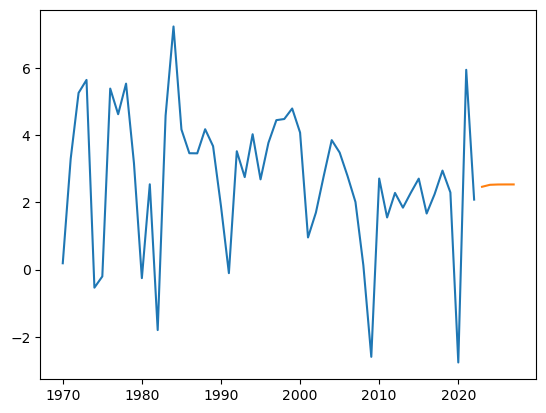

In [14]:
# ARIMA

arima(us_year_gdp,5)

2023-01-01    1.775142
2024-01-01    2.183330
2025-01-01    2.289879
2026-01-01    1.447043
2027-01-01    1.665816
Freq: AS-JAN, dtype: float64


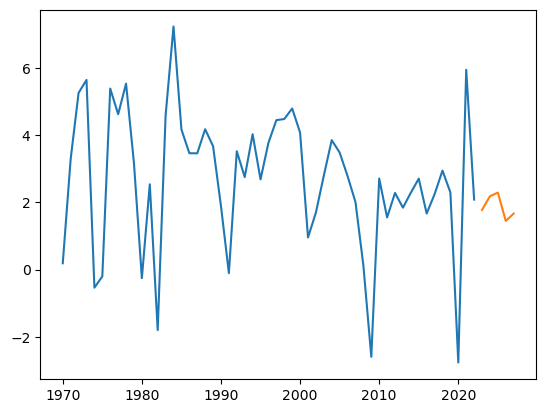

In [15]:
# Holt Winters

hf(us_year_gdp,5)

## Predicting UK annual GDP growth rates using ARIMA and Holt Winters models


2023-01-01    1.931358
2024-01-01    1.851430
2025-01-01    1.848342
2026-01-01    1.848222
2027-01-01    1.848218
Freq: AS-JAN, Name: predicted_mean, dtype: float64


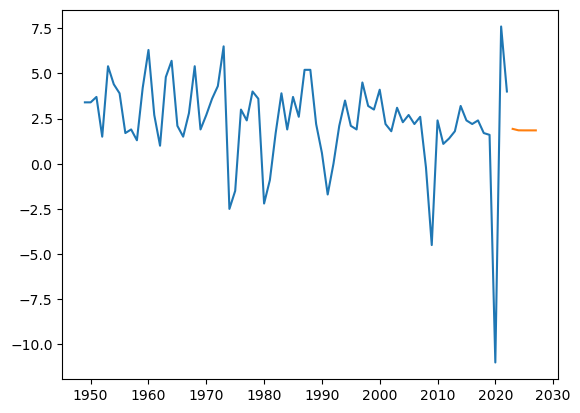

In [16]:
# ARIMA

arima(uk_year_gdp,5)

2023-01-01    1.568843
2024-01-01    0.741065
2025-01-01    1.457846
2026-01-01    1.068372
2027-01-01    1.450943
Freq: AS-JAN, dtype: float64


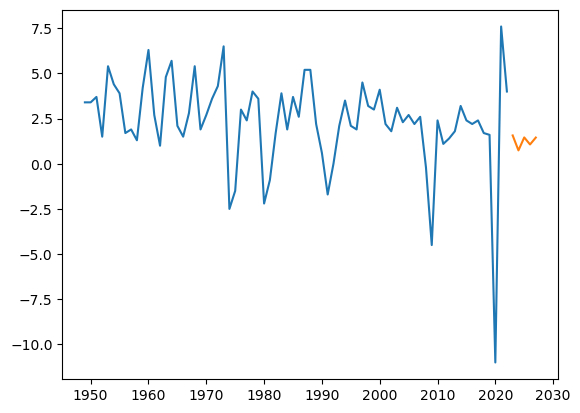

In [17]:
# Holt Winters

hf(uk_year_gdp,5)

## Predicting Germany annual GDP growth rates using ARIMA and Holt Winters models


2023-01-01    1.220066
2024-01-01    1.271736
2025-01-01    1.267810
2026-01-01    1.268108
2027-01-01    1.268085
Freq: AS-JAN, Name: predicted_mean, dtype: float64


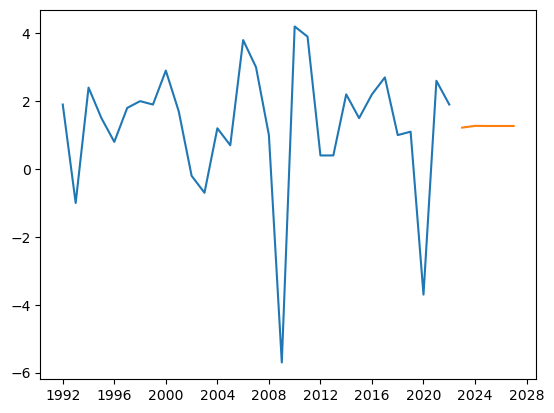

In [18]:
#ARIMA 

arima(ger_year_gdp,5)

2023-01-01    1.532452
2024-01-01    0.600778
2025-01-01    0.163303
2026-01-01    1.925788
2027-01-01    1.479851
Freq: AS-JAN, dtype: float64


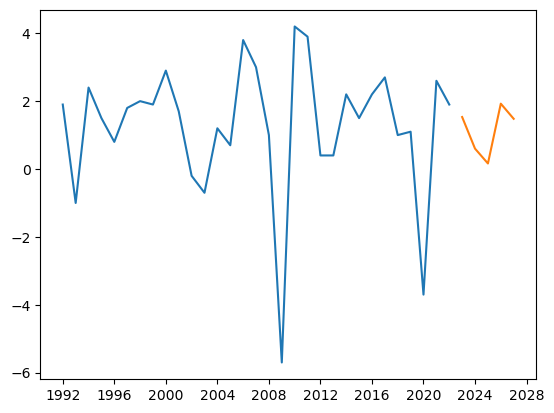

In [19]:
# Holt Winters

hf(ger_year_gdp,5)